## Exploratory Data Analysis of Major US Markets

To begin, we will start by installing the dependencies we need. 
We'll need pandas, numpy, matplotlib and seaborn. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings as wr 

In [ ]:
!pip install seaborn

In [ ]:
!pip freeze >> requirements.txt

In [ ]:
f = open("requirements.txt", "r")
for line in f:
    print(line.strip())
f.close()

In [ ]:
csv_file = "/home/whaler/github/us-markets-eda/data/sp500.csv"
df = pd.read_csv(csv_file)
print(df.head)

By looking at the dataframe, we can tell that this data represents OHLC prices for the SPX Index at monthly intervals. 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%y")

for col in ['Price', 'Open', 'High', 'Low']:
    df[col] = df[col].str.replace(',', '', regex=False).astype(float)

df['Change %'] = df['Change %'].str.replace('%', '', regex=False).astype(float)

print("DataFrame Info after processing:")
df.info()

print("\nDataFrame head after processing:")
print(df.head())

In [ ]:
shape = df.shape
print(shape)

prices = df.loc[:, df.columns.str.contains('Price')]
print(prices)


Now let's create a dataframe of just the date and the price. 

This will prepare the data for a simple time-series plot

In [ ]:
# Define 'dates' as the 'Date' Series from your DataFrame
dates_series = df['Date']

# Define 'prices' as a DataFrame containing the relevant price columns
prices_df = df['Price']

# Now, use pd.concat with a list of the pandas objects to combine them along columns (axis=1)
new_df = pd.concat([dates_series, prices_df], axis=1)

print(new_df.head())

In [ ]:
print(df.columns)

In [ ]:
print(new_df.columns)

Visualize the data with a simple line chart

In [ ]:
ndf = pd.DataFrame(new_df)

In [ ]:
print(ndf)

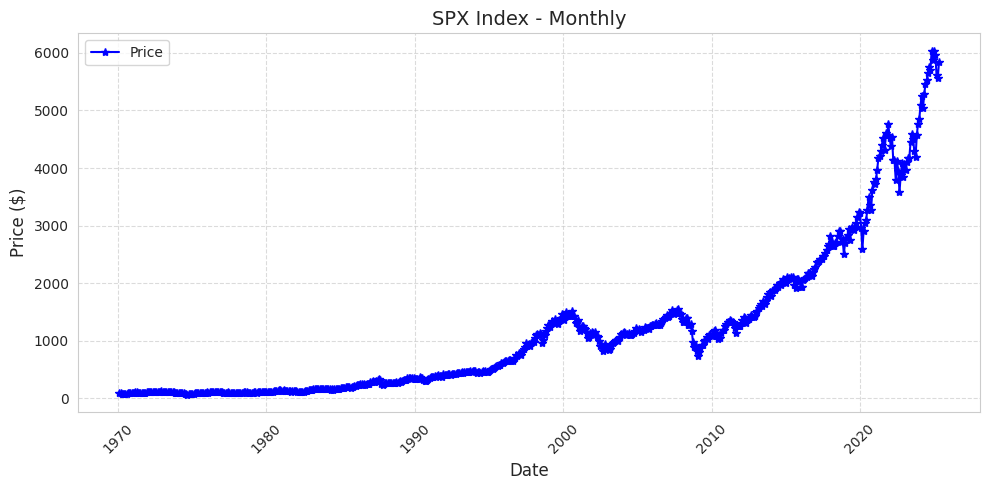

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(ndf['Date'], ndf['Price'], marker='*', linestyle='-', color='b', label='Price')
plt.title("SPX Index - Monthly", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### From this chart we can deduce that 2000-2010 were fairly stagnant years. 
##### Later on, we will correlate trends in this data with trends in Labor Market, Consumer Prices, et cetera.

### The equivalent chart using Seaborn 

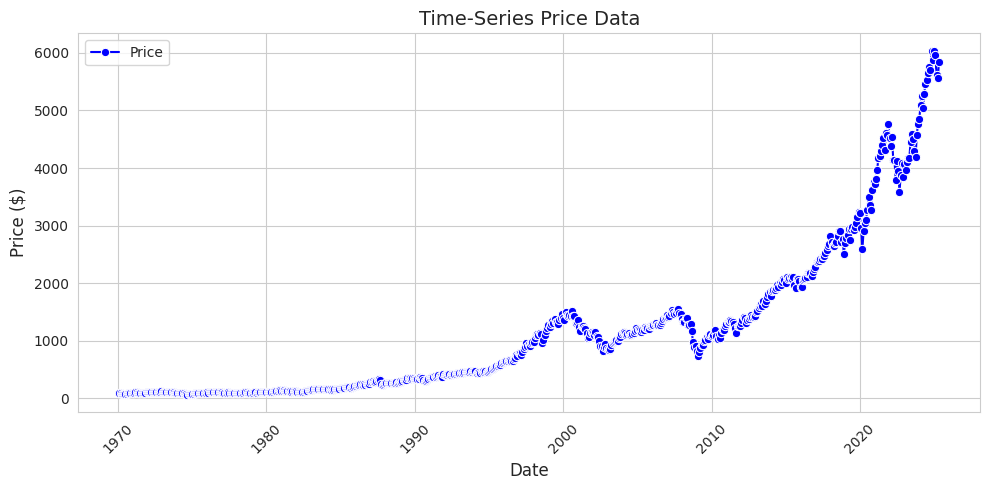

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the same DataFrame as above
sns.set_style('whitegrid')  # Set a clean grid style

# Create the plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=new_df, x='Date', y='Price', marker='o', color='b', label='Price', estimator='mean')

# Customize the plot
plt.title('Time-Series Price Data', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Adjust the date range now to the last 4 years
We have to grab them off the top because this is time-series data, the newest data is always
the most recent entry, so using df.head makes sense here.  


In [ ]:


recent_prices = df.head(48) 
print(recent_prices['Date'])

In [ ]:
print(recent_prices['Price'])

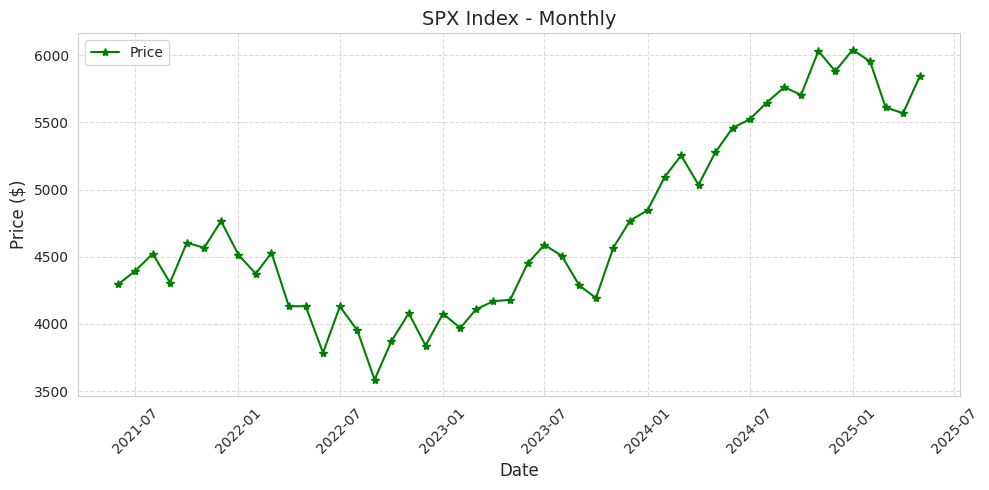

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(recent_prices['Date'], recent_prices['Price'], marker='*', linestyle='-', label='Price', 
         color='green')
plt.title("SPX Index - Monthly", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The SPX chart reflects a strong bull market with periods of volatility and consolidation. The index has shown resilience, particularly in 2024-2025, but investors should remain cautious of potential pullbacks or macroeconomic shifts (e.g., changes in Fed policy, geopolitical risks). If you're investing, this trend suggests a long-term bullish outlook, but short-term caution may be warranted during periods of rapid ascent.

- **Higher Highs and Higher Lows:** The chart shows a pattern of higher highs and higher lows, a classic sign of a bull market.
- **Support Levels:** The index found support around 4,200 (2022) and 4,800 (2023), which became launchpads for further gains.
- **Resistance Break:** The index broke through the 5,500 level in 2024, which may have acted as a psychological resistance before continuing higher.
- **Long-Term Uptrend:** The SPX index has shown a clear upward trajectory from mid-2021 to mid-2025, rising from around 4,200 to over 6,000.
- **Growth:** The index has grown by approximately 40-45% over this 4-year period, reflecting a strong bull market phase.
